# Week 8 Assignment

### 1. Load data into a pandas dataframe

In [137]:
import pandas as pd

#load dataframe in pandas
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, header=None)
df.head()


,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### 2. Set column names

In [138]:
# column_names 
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df.columns=column_names
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


   ### 3. Cleaning the data

In [139]:
missing_data = df[df.horsepower=='?'].index
# missing values
df.loc[missing_data]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [140]:
# assign NaN to the missing values
df.loc[missing_data, 'horsepower'] = float('nan')
df.loc[missing_data]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [141]:
# convert the column to numeric
df.horsepower = df.horsepower.apply(pd.to_numeric)
# fill in the NaN values with the mean value of the column
df.loc[missing_data, 'horsepower'] = int(df.horsepower.mean())
df.loc[missing_data]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,104.0,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,104.0,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,104.0,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,104.0,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,104.0,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,104.0,3035.0,20.5,82,1,amc concord dl


### 4. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’

In [142]:

# USA
america=df[df.origin==1].index
df.loc[america,'origin']="USA"
#  Asia
asia=df[df.origin==2].index
df.loc[asia,'origin']="Asia"
#  Europe
europe=df[df.origin==3].index
df.loc[europe,'origin']="Europe"

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


### 5. Creating a barchart that shows the distribution for cylinders

[Text(0, 0.5, 'Number of Cars'), Text(0.5, 0, 'Cylinders')]

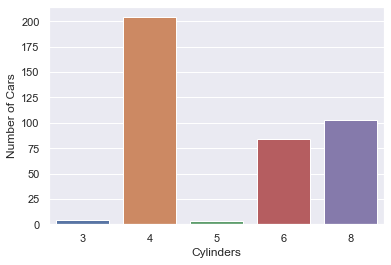

In [143]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df_grpd = df.groupby("cylinders").count().reset_index()
x=sns.barplot(x="cylinders", y='car name', ci=None, data=df_grpd)
x.set(xlabel='Cylinders', ylabel='Number of Cars')

### 6. Create a scatterplot that shows the relationship between horsepower and weight

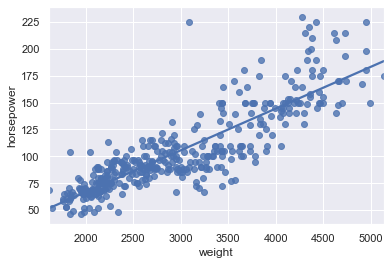

In [144]:
sns.regplot(x='weight', y='horsepower', ci=None, data=df)

### 7. Create a scatterplot that shows the relationship between miles per galon (mpg) and weight

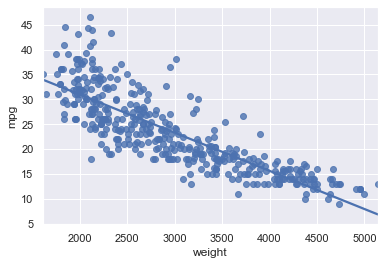

In [145]:
sns.regplot(x='weight', y='mpg', ci=None, data=df)